## A web crawling primer

Let us start by extending the previous example with the help of BeautifulSoup, being able to handle the HTML content of the website.

In [8]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [7]:
html = urlopen('http://www.pythonscraping.com/pages/page1.html')

"""To create a BeautifulSoup object, we will need two different parameters:
1 - the HTML text the object is based on 
2 - the parser that BeautifulSoup uses in order to create the object. html.parser is a parser that is included with 
Python 3 and requires no extra installations in order to use. """
bs = BeautifulSoup(html.read(), 'html.parser')

"""We could have used the following elements instead:
bs.html.body.h1
bs.body.h1
bs.html.h1
"""
print(bs.h1)



<h1>An Interesting Title</h1>


The HTML content is then transformed into a BeautifulSoup object, with the following structure

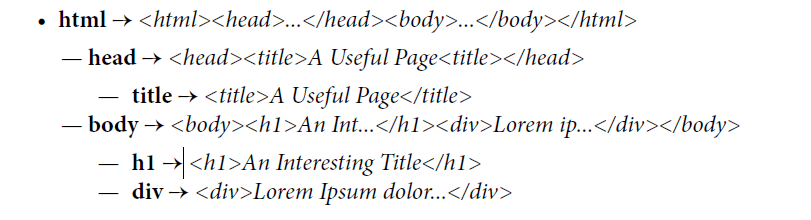

## Connecting Reliably and Handling Exceptions

The web is messy. Data is poorly formatted, websites go down, and closing tags go
missing. One of the most frustrating experiences in web scraping is to go to sleep
with a scraper running and find that the scraper hit an error on some unexpected data format and
stopped execution shortly after you stopped looking at the screen.

To overcome these problems, we must define a proper handling exception strategy that avoid makes our web scraper fault tollerant and, therefore, resilient.

Speaking about our previous example, two things may have gone wrong:

1. The page is not found on the server (or there was an error in retrieving it)
2. The server is not found.

In the first situation, an HTTP error will be returned. This HTTP error may be “404
Page Not Found,” “500 Internal Server Error,” and so forth. In all of these cases, the
_urlopen_ function will throw the generic exception _HTTPError_.

We can handle this exception in the following way:

In [12]:
from urllib.request import urlopen
from urllib.error import HTTPError
try:
    html = urlopen('http://www.pythonscraping.com/pages/page1.html')
except HTTPError as e:
    print(e)
    # return null, break, or do some other "Plan B"
else:
    # program continues. Note: If you return or break in the
    # exception catch, you do not need to use the "else" statement
    print(html.read())

b'<html>\n<head>\n<title>A Useful Page</title>\n</head>\n<body>\n<h1>An Interesting Title</h1>\n<div>\nLorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.\n</div>\n</body>\n</html>\n'


Speaking about the second scenario, if the server is not found at all (if, say, http://www.pythonscraping.com is down, or the
URL is mistyped), urlopen will throw an URLError. This indicates that no server
could be reached at all, and, because the remote server is responsible for returning
HTTP status codes, an HTTPError cannot be thrown, and the more serious URLError
must be caught.

We can manage this scenario in the following way:

In [13]:
from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError
try:
    html = urlopen('https://pythonscrapingthisurldoesnotexist.com')
except HTTPError as e:
    print(e)
except URLError as e:
    print('The server could not be found!')
else:
    print('It Worked!')

The server could not be found!


Of course, if the page is retrieved successfully from the server, there is still the issue of
the content on the page not quite being what you expected. Every time you access a
tag in a BeautifulSoup object, it’s smart to add a check to make sure the tag actually
exists. **If we attempt to access a tag that does not exist, BeautifulSoup will return a
None object. The problem is, attempting to access a tag on a None object itself will
result in an AttributeError being thrown.**

Indeed, let's say we have a non-existing tag to deal with:

In [14]:
print(bs.nonExistentTag)

None


It returns a None object as expected. This object is perfectly reasonable to handle and check for. The
trouble comes if we don't check for it, but instead we go on and try to call another function
on the None object, as illustrated in the following snippet:

In [15]:
print(bs.nonExistentTag.someTag)

AttributeError: 'NoneType' object has no attribute 'someTag'

The easiest way to guard against these two situations is to appositely check for both of them:

In [17]:
try:
    badContent = bs.nonExistingTag.anotherTag
except AttributeError as e:
    print('Tag was not found')
else:
    if badContent == None:
        print ('Tag was not found')
    else:
        print(badContent)

Tag was not found


Introducing this type of content however may introduce some messiness in the code we are writing. It is therefore suggested to apply some refactoring or SOLID principles in order to make our scraper tidier. For example:

In [18]:
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup

def getTitle(url):
    try:
        html = urlopen(url)
    except HTTPError as e:
        return None
    try:
        bs = BeautifulSoup(html.read(), 'html.parser')
        title = bs.body.h1
    except AttributeError as e:
        return None
    return title
    
title = getTitle('http://www.pythonscraping.com/pages/page1.html')
if title == None:
    print('Title could not be found')
else:
    print(title)

<h1>An Interesting Title</h1>


Introduces the _getTitle_ function which is appositely made for retrieving the h1 tag of the website's body.